# Session 02
---

## SQL with Python's SQLite3 

In [ ]:
%pip install -r requirements.txt
#%pip freeze > requirements.txt

In [22]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Simulate loading data from an Excel file into a DataFrame
purchase_data = {'Customer_ID': [1, 2, 3, 4, 5, 6],
                 'Purchase_Amount': [50, 15, 80, 45, 100, 10]}
df = pd.DataFrame(purchase_data)
print("Original Table")
print(df)
print("\n")
# Connect to SQLite database (or create it if it doesn't exist)
conn = sqlite3.connect('customer_data.db')
c = conn.cursor()

# Create a table for our data
c.execute('''CREATE TABLE IF NOT EXISTS purchases
             (Customer_ID INT, Purchase_Amount INT)''')

# Insert data from DataFrame into the SQLite table
df.to_sql('purchases', conn, if_exists='replace', index=False)

# Querying the data back to check
c.execute('''SELECT * FROM purchases WHERE Purchase_Amount > 50''')
print("SQL Output")
for row in c.fetchall():
    print(row)


Original Table
   Customer_ID  Purchase_Amount
0            1               50
1            2               15
2            3               80
3            4               45
4            5              100
5            6               10


SQL Output
(3, 80)
(5, 100)


---

## <b>Concept Overview:</b>
- The TRANSPOSE function changes data orientation, crucial for effective data visualization and analysis in marketing.
Essential for reformatting data to align with marketing research, advertising strategies, and sales analytics.

- Real-World Application:
    - Case Study: "The Bakery Campaign Analysis":
        - A bakery used TRANSPOSE to reorient customer feedback data, enhancing their marketing campaign's effectiveness.

- Result: Improved targeting and customization of marketing messages.

In [32]:
import pandas as pd
import sqlite3

# Load Excel file into a DataFrame
excel_file = 'Session02_LabA_Data_.xlsx'
# Read the 27th row as data, without headers
df = pd.read_excel(excel_file, sheet_name='Histogram', usecols='N:Q', skiprows=26, nrows=1, header=None)

# Set custom column names
df.columns = ['Name1', 'Name2', 'Name3', 'Name4']

# Transpose the DataFrame
transposed_df = df.transpose()

# Reset the index to move the old index to a column
transposed_df.reset_index(inplace=True)
# Rename the columns
transposed_df.columns = ['NameID', 'Name']

print("Original Table")
print(df)
print("\n")

# Create SQLite database and table
conn = sqlite3.connect('Chapter3bakery.db')
transposed_df.to_sql('student_names', conn, if_exists='replace', index=False)

# Display the table
print("Transposed Table")
print(transposed_df)
print("\n")

# SQL query to display the transposed data
query = """
SELECT * FROM student_names
"""
result = pd.read_sql_query(query, conn)
print("SQL Output")
print(result)


Original Table
      Name1    Name2    Name3  Name4
0  Scarlett  Lindsay  Britney  Paris


Transposed Table
  NameID      Name
0  Name1  Scarlett
1  Name2   Lindsay
2  Name3   Britney
3  Name4     Paris


SQL Output
  NameID      Name
0  Name1  Scarlett
1  Name2   Lindsay
2  Name3   Britney
3  Name4     Paris


Original Table
        Date  Cakes
0 2013-01-01     79
1 2013-01-02     91
2 2013-01-03     47
3 2013-01-04     89
4 2013-01-05    112


Skewness of cake sales: [0.42657677]


Symmetric
Frequency distribution: [ 24 191 440 294 117  25   4]




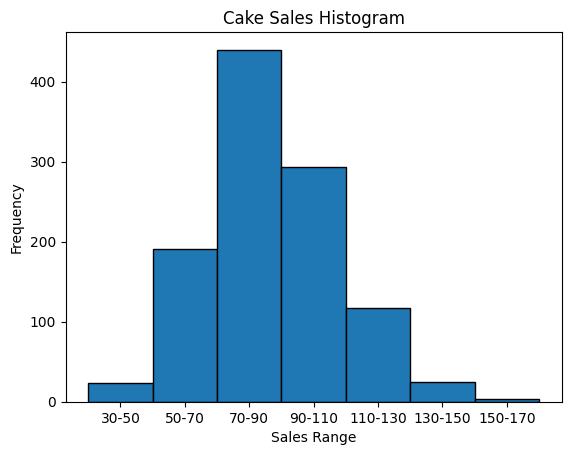

In [5]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import scipy.stats as stats

# Load the data
excel_file = 'Session02_LabA_Data_.xlsx'
df = pd.read_excel(excel_file, sheet_name='Histogram', usecols='D:E', skiprows=6, nrows=1102)
print("Original Table")
print(df.head())
print("\n")

# Create SQLite database and table
conn = sqlite3.connect('Histogram.db')
df.to_sql('cake_sales', conn, if_exists='replace', index=False)

# Define bin ranges
bins = [30, 50, 70, 90, 110, 130, 150, 170]

# SQL query to get sales data
query = "SELECT Cakes FROM cake_sales"
sales_data = pd.read_sql_query(query, conn)


# Calculate skewness
skewness = stats.skew(sales_data)
print(f"Skewness of cake sales: {skewness}")
print("\n")

# Interpretation
if skewness > 1:
    print("Positively skewed")
elif skewness < -1:
    print("Negatively skewed")
else:
    print("Symmetric")

# Calculate frequency
hist, _ = np.histogram(sales_data, bins=bins)
print("Frequency distribution:", hist)
print("\n")

# Plotting the histogram
plt.bar(range(len(hist)), hist, width=1, edgecolor='black')
plt.xticks(range(len(hist)), [f'{bins[i]}-{bins[i+1]}' for i in range(len(bins)-1)])
plt.title("Cake Sales Histogram")
plt.xlabel("Sales Range")
plt.ylabel("Frequency")
plt.show()


---

## **Simplifying Market Data Analysis: Using Statistical Functions for Insight**

- Concept Overview:
    - Utilizing statistical functions (mean, median, mode) to extract actionable insights from large marketing datasets.
    - These measures simplify data, revealing the typical value and variation in consumer behavior.

- Real-World Application:
-   Example: "La Petit Bakery Sales Analysis":
        - Analysis of daily sales using mean, median, and mode helped understand customer purchasing patterns.
        

In [12]:
import pandas as pd
import sqlite3
from scipy import stats
import numpy as np

# Load data from Excel
excel_file = 'Session02_LabA_Data_.xlsx'
df = pd.read_excel(excel_file, sheet_name='Histogram', usecols='D:E', skiprows=6, nrows=1102)

# Creating a SQLite database
conn = sqlite3.connect('Chapter3bakery.db')
df.to_sql('bakery_sales', conn, if_exists='replace', index=False)

# Define function to calculate mean, median, and mode
def calculate_stats(column):
    mean = round(df[column].mean(), 2)
    median = round(df[column].median(), 2)
    mode = round(df[column].mode()[0], 2)
    return mean, median, mode

# Example: Calculating stats for cakes
mean_cakes, median_cakes, mode_cakes = calculate_stats('Cakes')
print(f"Mean: {mean_cakes}, Median: {median_cakes}, Mode: {mode_cakes}")
print("\n")


# Define function to calculate variance and standard deviation
def calculate_variance_std(column):
    variance = round(np.var(df[column], ddof=1), 2)
    std_dev = round(np.sqrt(variance), 2)
    return variance, std_dev

# Example: Calculating for cakes
variance_cakes, std_dev_cakes = calculate_variance_std('Cakes')
print(f"Variance: {variance_cakes}, Standard Deviation: {std_dev_cakes}")
print("\n")


Mean: 86.28, Median: 85.0, Mode: 90


Variance: 411.14, Standard Deviation: 20.28




In [13]:
import pandas as pd
import numpy as np

# Hypothetical function to simulate demand response
def demand_response(price, elasticity, base_demand=100, base_price=10):
    """Calculate demand change given price change and elasticity."""
    percent_change_in_price = (price - base_price) / base_price
    change_in_demand = -elasticity * percent_change_in_price * base_demand
    return base_demand + change_in_demand

# Example calculation for a product with elasticity of 1.2
elasticity = 1.2
new_price = 11  # Assuming a 10% price increase from a base price of 10
new_demand = demand_response(new_price, elasticity)

print(f"New demand at price ${new_price}: {new_demand} units")


New demand at price $11: 88.0 units


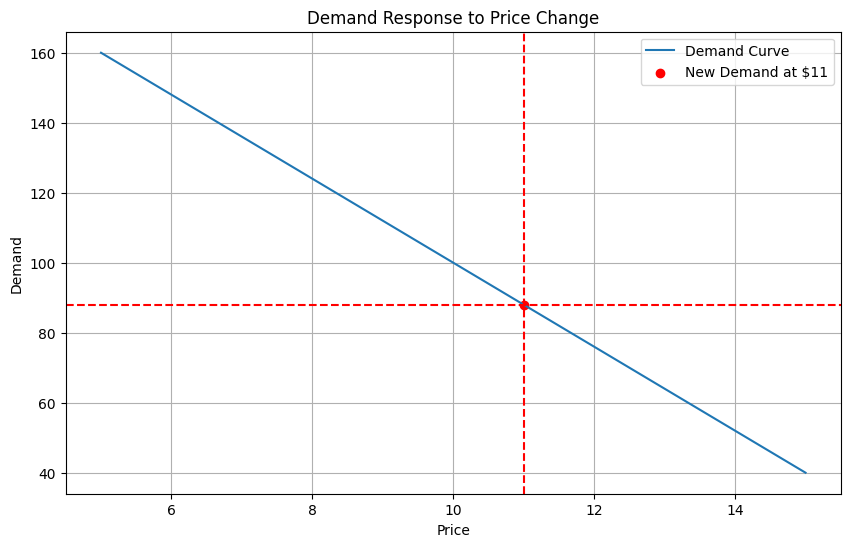

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Hypothetical function to simulate demand response
def demand_response(price, elasticity, base_demand=100, base_price=10):
    """Calculate demand change given price change and elasticity."""
    percent_change_in_price = (price - base_price) / base_price
    change_in_demand = -elasticity * percent_change_in_price * base_demand
    return base_demand + change_in_demand

# Example calculation for a product with elasticity of 1.2
elasticity = 1.2

# Generate a range of prices around the base price
prices = np.linspace(5, 15, 100)  # Generate 100 points between $5 and $15
demands = [demand_response(price, elasticity) for price in prices]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(prices, demands, label='Demand Curve')
plt.scatter(11, demand_response(11, elasticity), color='red', label='New Demand at $11')  # Highlight the new demand
plt.title('Demand Response to Price Change')
plt.xlabel('Price')
plt.ylabel('Demand')
plt.axhline(y=demand_response(11, elasticity), color='r', linestyle='--')
plt.axvline(x=11, color='r', linestyle='--')
plt.legend()
plt.grid(True)
plt.show()
